In [1]:
import pandas as pd

file_path = r"C:\Users\Eileen Lok\6006CEM_ML_Portfolio\classification_task\bank.csv"


data = pd.read_csv(file_path)


In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Eileen Lok\6006CEM_ML_Portfolio\classification_task\bank.csv")
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [5]:
# Pre-Modelling EDA
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.head()


Shape: (11162, 17)

Data Types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Dataset Loaded Successfully!

--- Dataset Shape ---
(11162, 17)

--- Data Types ---
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

--- Missing Values ---
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

--- First 5 Rows ---


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


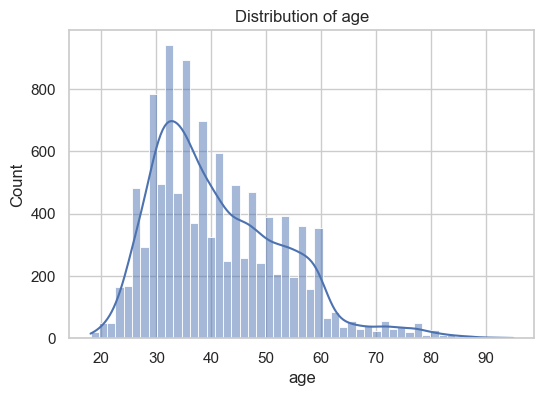

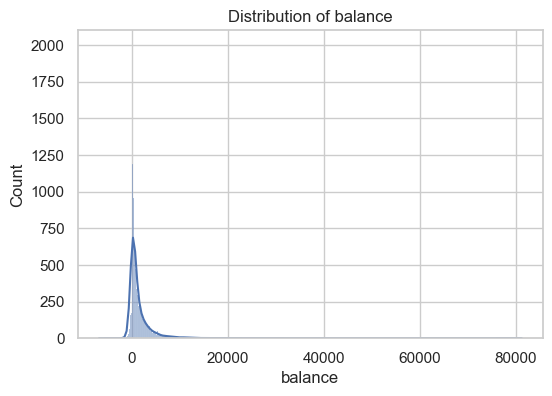

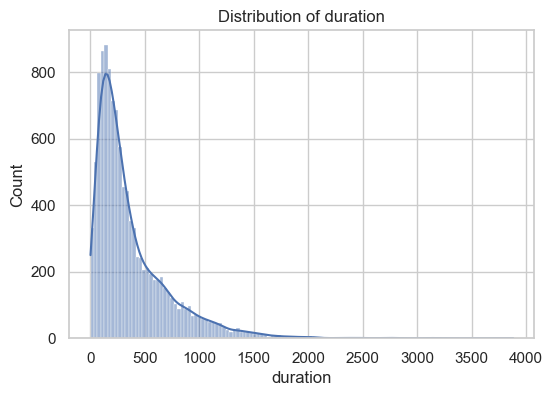

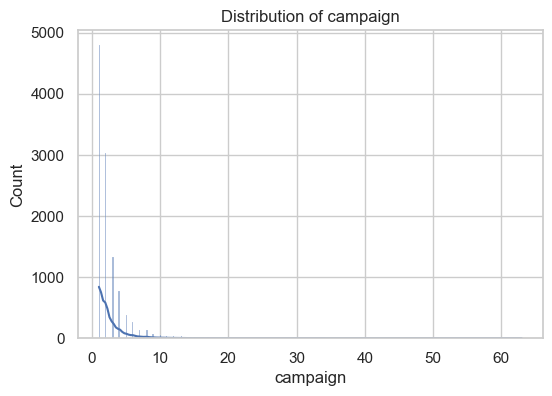

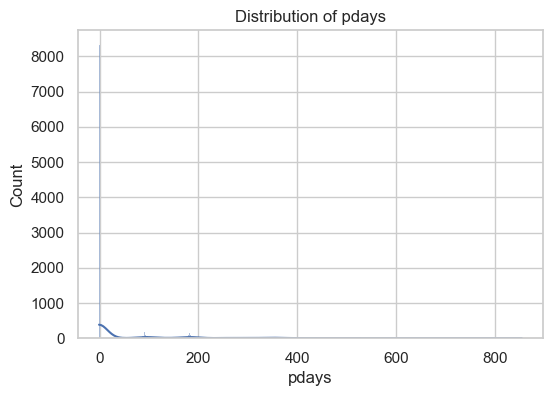

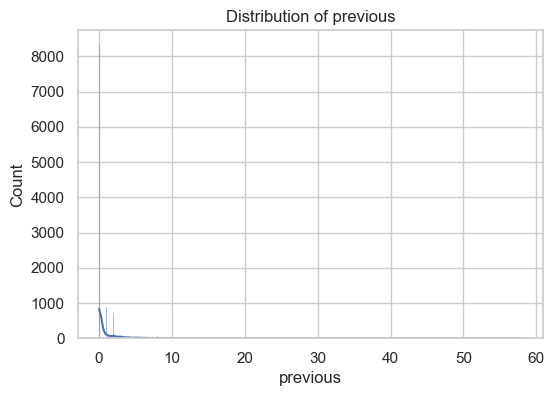

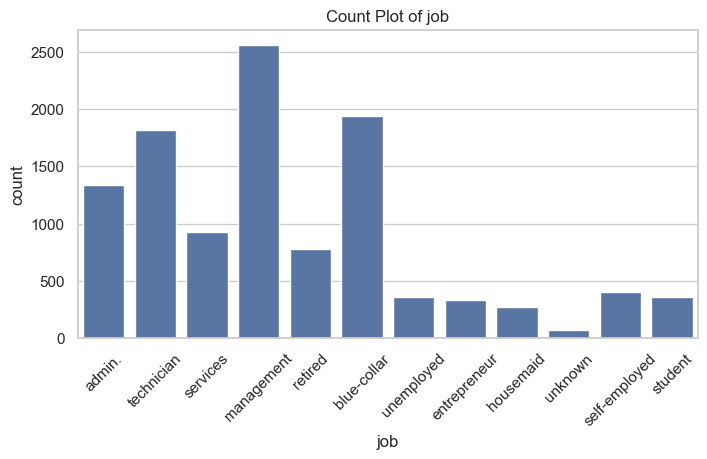

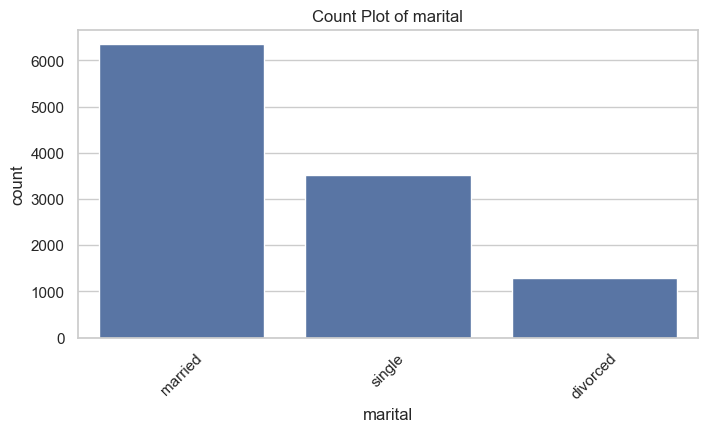

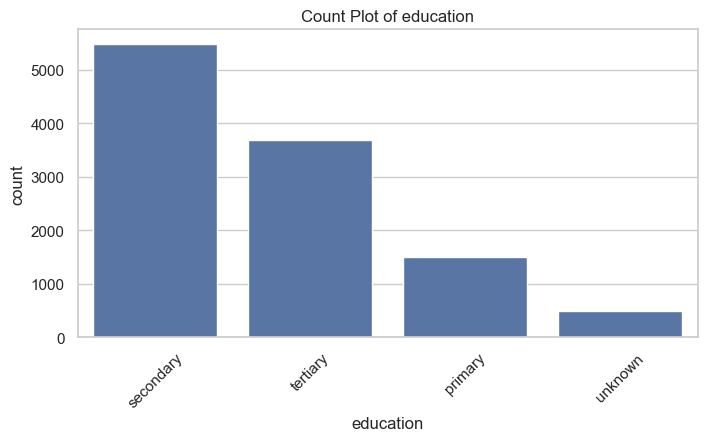

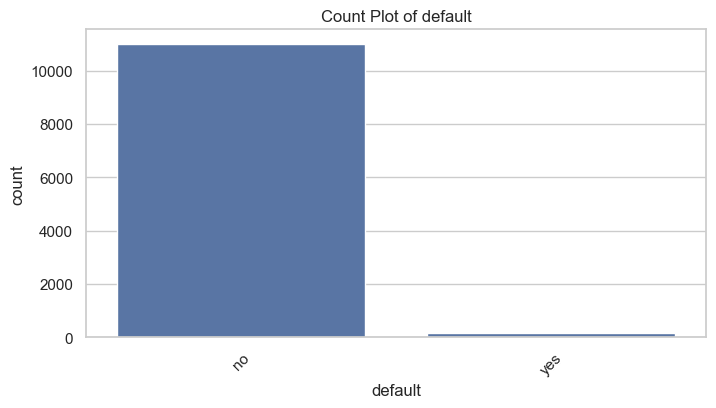

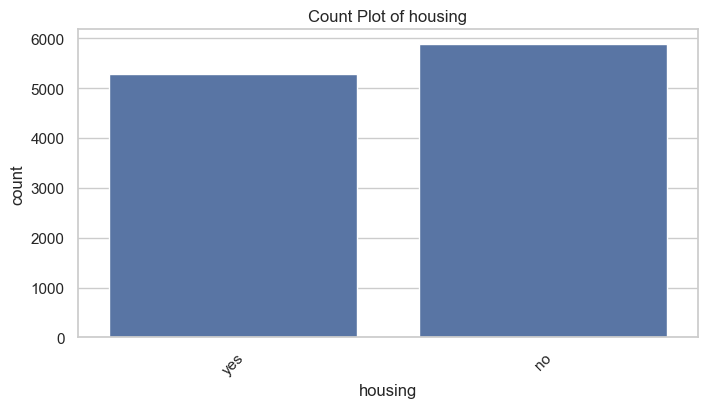

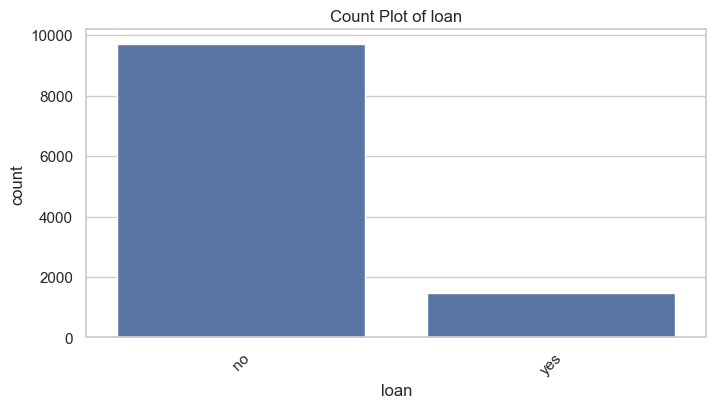

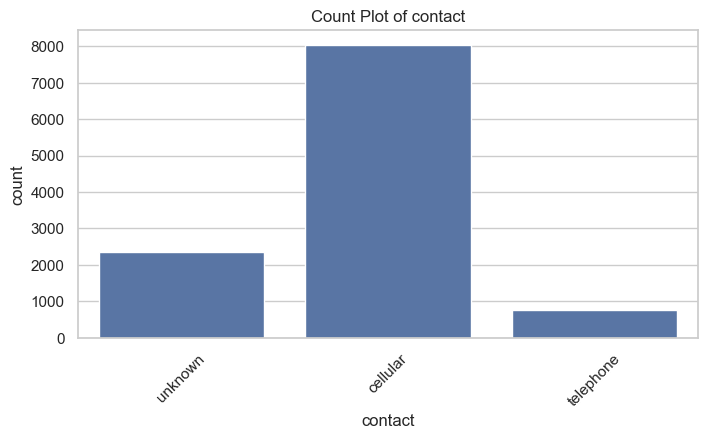

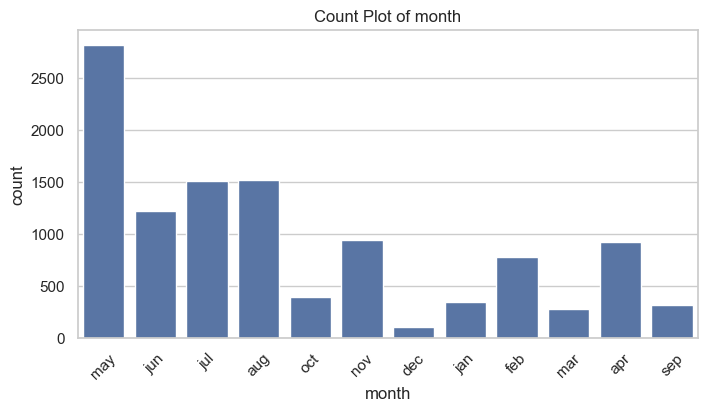

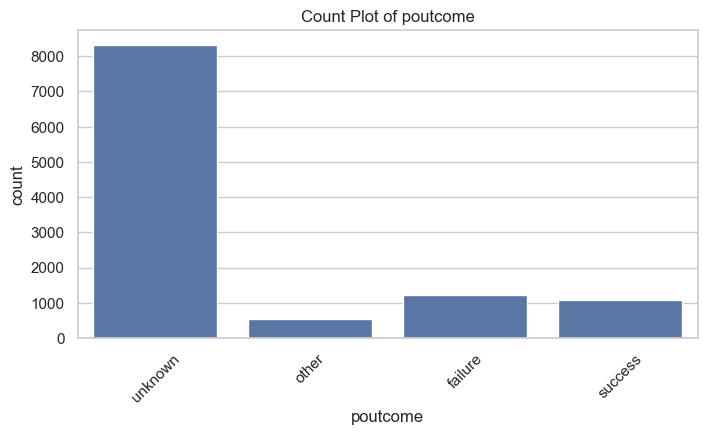

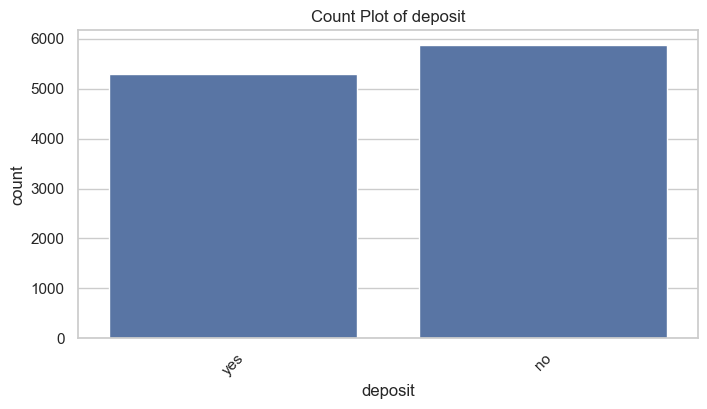

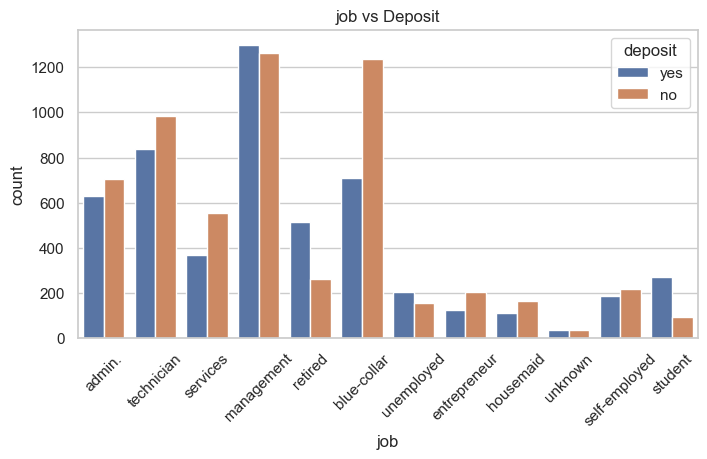

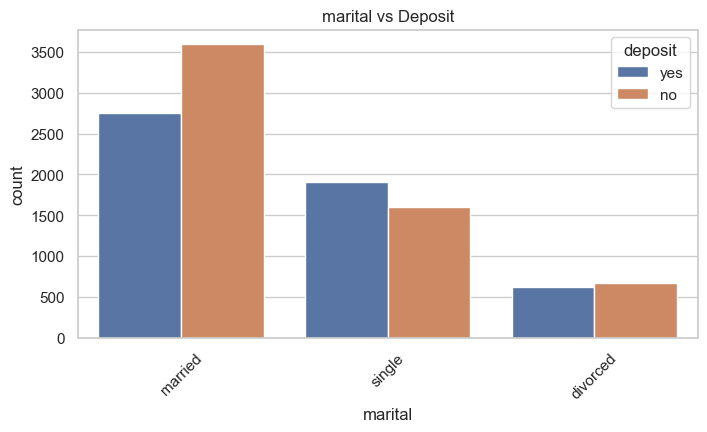

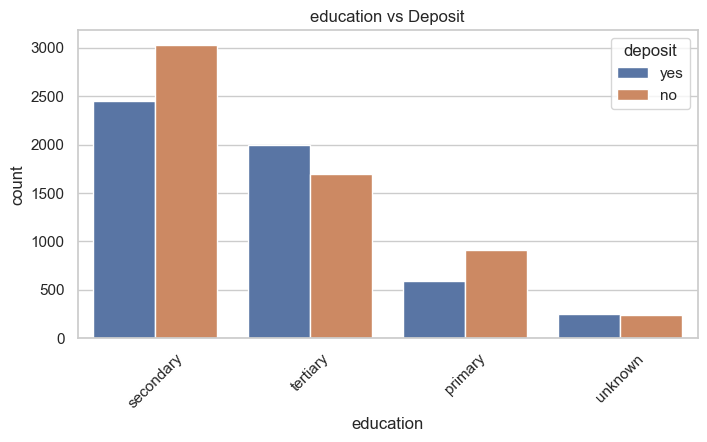

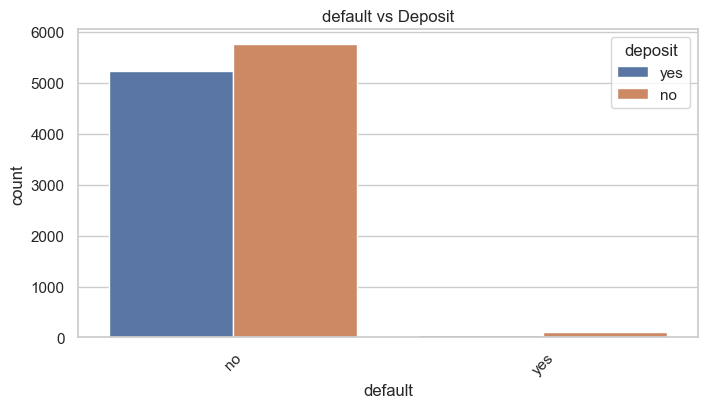

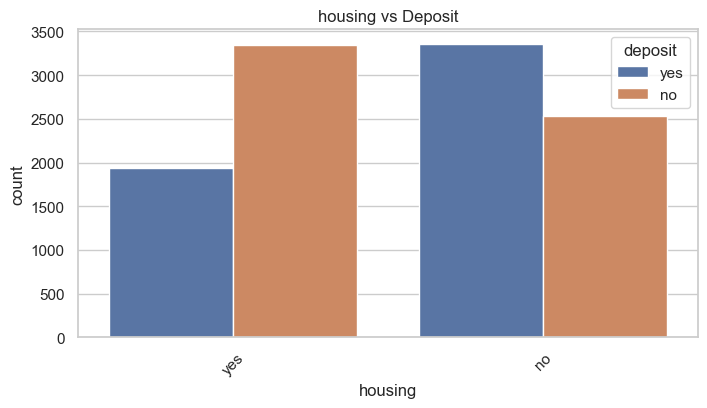

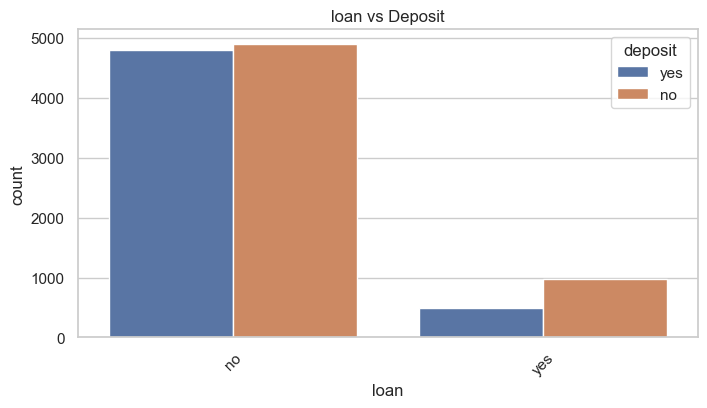

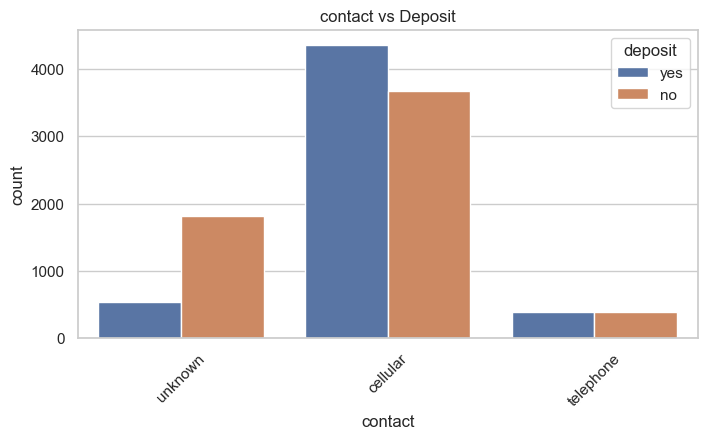

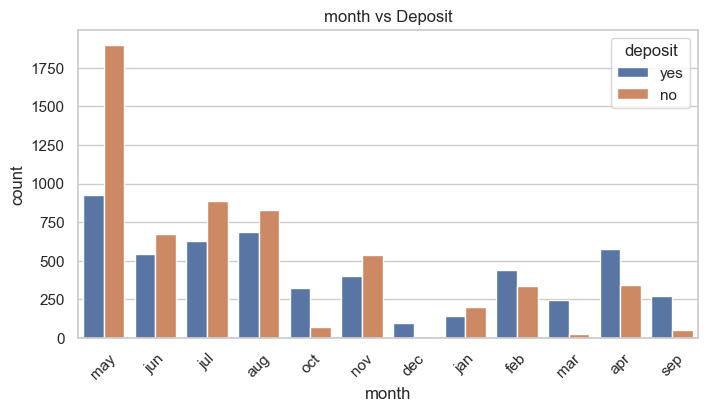

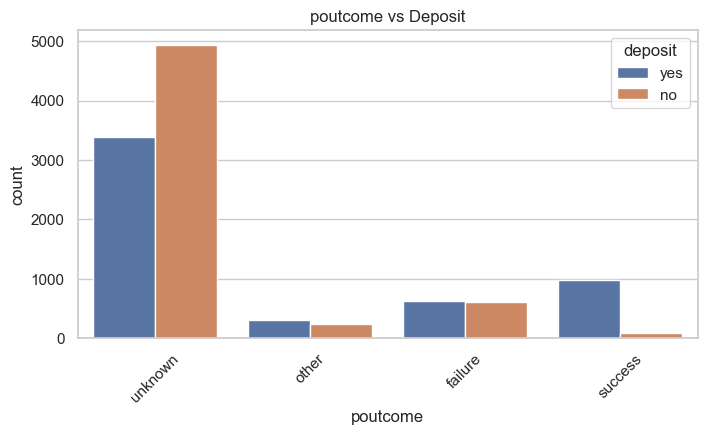

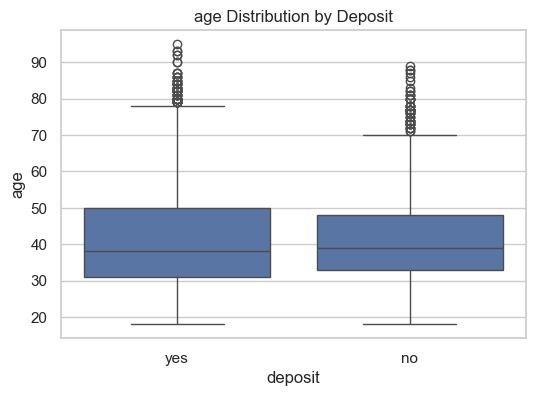

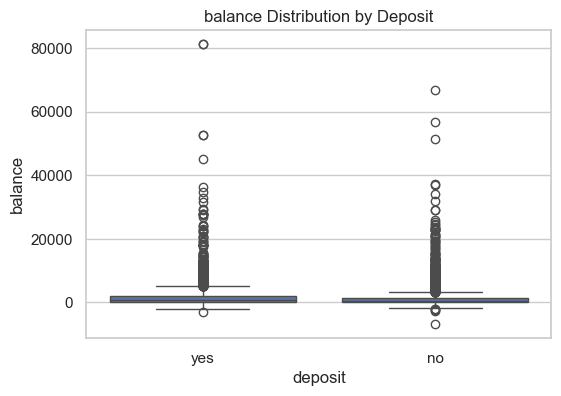

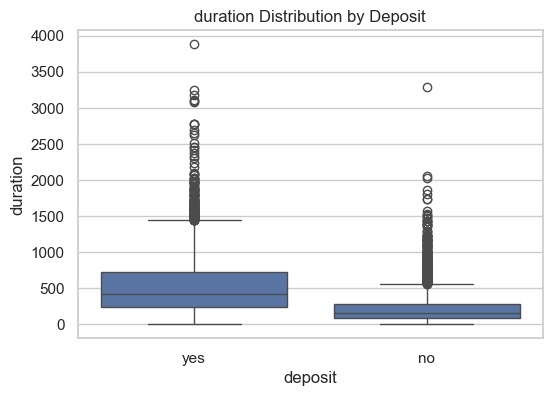

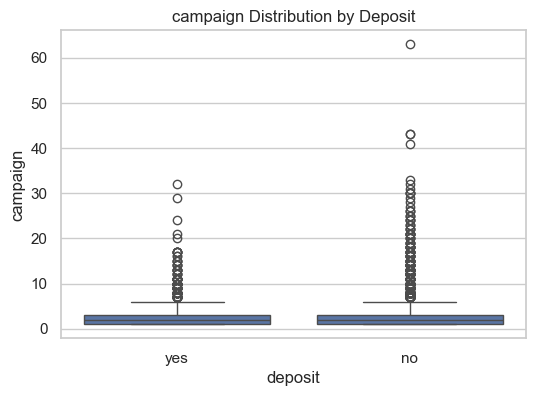

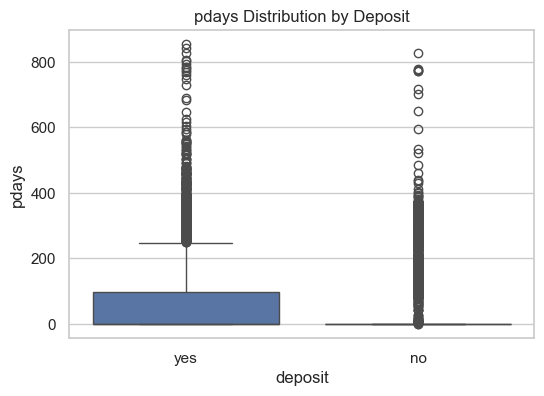

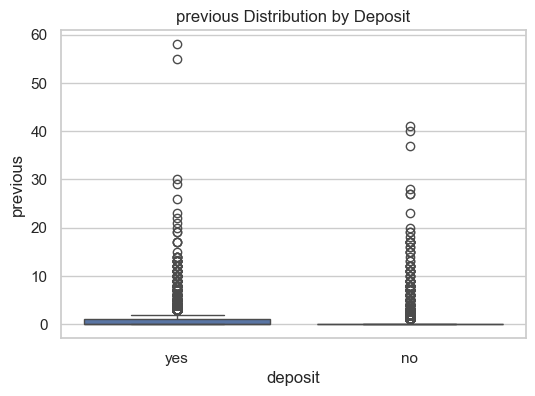

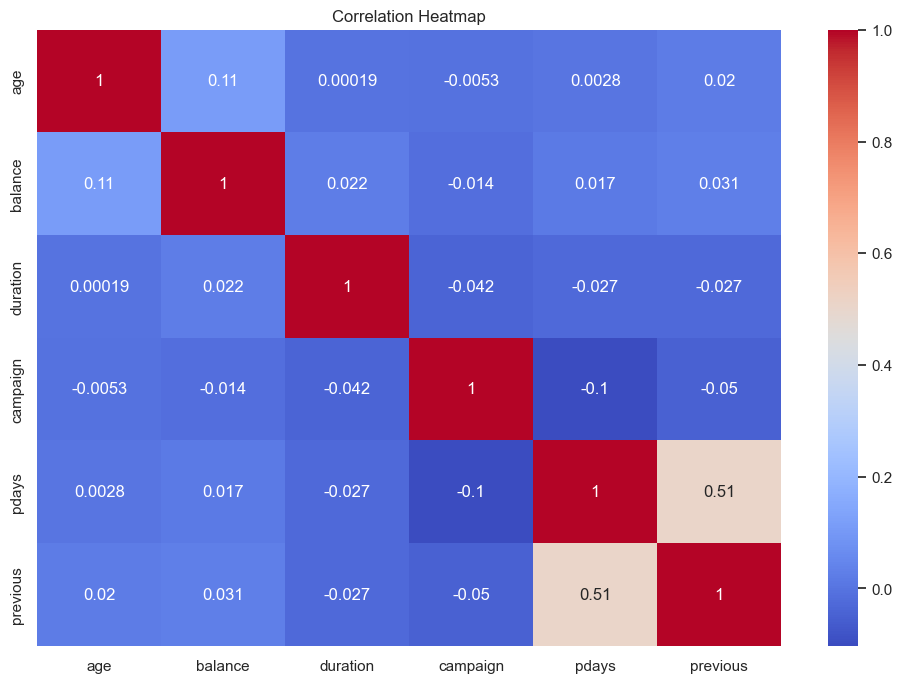


--- Crosstab: Education vs Deposit ---


deposit,no,yes
education,,
primary,909,591
secondary,3026,2450
tertiary,1693,1996
unknown,245,252



--- Crosstab %: Education vs Deposit ---


deposit,no,yes
education,,
primary,60.600000,39.400000
secondary,55.259313,44.740687
tertiary,45.893196,54.106804
unknown,49.295775,50.704225



--- Pivot Table: Average Age by Job and Deposit ---


deposit,no,yes
job,,
admin.,39.297297,39.459588
blue-collar,39.922330,38.776836
entrepreneur,43.004878,42.691057
housemaid,46.242424,49.266055
management,40.530435,39.914681
retired,61.465649,67.434109
self-employed,40.688073,38.786096
services,38.583032,37.479675
student,27.153846,25.747212



EDA Completed Successfully!


In [7]:
# -----------------------------------------------------------
# Step 0 — Load Libraries
# -----------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For cleaner plots
sns.set(style="whitegrid")

# -----------------------------------------------------------
# Step 1 — Load Dataset
# -----------------------------------------------------------
file_path = r"C:\Users\Eileen Lok\6006CEM_ML_Portfolio\classification_task\bank.csv"
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully!")

# -----------------------------------------------------------
# Step 2 — Basic Dataset Overview
# -----------------------------------------------------------
print("\n--- Dataset Shape ---")
print(df.shape)

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- First 5 Rows ---")
display(df.head())

# -----------------------------------------------------------
# Step 3 — Univariate Analysis
# -----------------------------------------------------------

# Numerical features
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical features
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome', 'deposit']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# -----------------------------------------------------------
# Step 4 — Bivariate Analysis (Feature vs Target)
# -----------------------------------------------------------
target = "deposit"

for col in cat_cols:
    if col != target:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, hue=target)
        plt.title(f"{col} vs Deposit")
        plt.xticks(rotation=45)
        plt.show()

# Numerical → Target (Boxplots)
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[target], y=df[col])
    plt.title(f"{col} Distribution by Deposit")
    plt.show()

# -----------------------------------------------------------
# Step 5 — Multivariate Analysis
# -----------------------------------------------------------
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------------------------------------
# Step 6 — Pivot Tables / Crosstab
# -----------------------------------------------------------

# Crosstab Counts
print("\n--- Crosstab: Education vs Deposit ---")
cross1 = pd.crosstab(df['education'], df['deposit'])
display(cross1)

# Crosstab Percentages
print("\n--- Crosstab %: Education vs Deposit ---")
cross2 = pd.crosstab(df['education'], df['deposit'], normalize='index') * 100
display(cross2)

# Pivot: Average Age by Job & Deposit
print("\n--- Pivot Table: Average Age by Job and Deposit ---")
pivot = df.pivot_table(values='age', index='job', columns='deposit', aggfunc='mean')
display(pivot)

print("\nEDA Completed Successfully!")


In [8]:
# Step 2: Data Preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Drop duplicates
data = data.drop_duplicates()

# 2. Separate features and target
X = data.drop("deposit", axis=1)
y = data["deposit"]

# 3. Check categorical vs numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numeric Columns:", list(numeric_cols))

# 4. Handle missing values
X[categorical_cols] = X[categorical_cols].fillna("unknown")
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# 5. One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# 6. Convert target to binary 0/1
y = y.map({"yes": 1, "no": 0})

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Scale numerical columns
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Preprocessing complete!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numeric Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Preprocessing complete!
Training shape: (8929, 42)
Testing shape: (2233, 42)


In [9]:
# Step 3: Model Training & Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd

results_clf = {}

In [10]:
# ----------------------------------------
# 1. Logistic Regression (Baseline Model)
# ----------------------------------------

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_prob = lr_clf.predict_proba(X_test)[:, 1]

results_clf["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, lr_pred),
    "Precision": precision_score(y_test, lr_pred),
    "Recall": recall_score(y_test, lr_pred),
    "F1 Score": f1_score(y_test, lr_pred),
    "ROC AUC": roc_auc_score(y_test, lr_pred_prob)
}

In [11]:
# ----------------------------------------
# 2. Deep Learning Model (Neural Network)
# ----------------------------------------

dl_clf = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')   # sigmoid because binary classification
])

dl_clf.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

dl_clf.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

dl_pred_prob = dl_clf.predict(X_test).flatten()
dl_pred = (dl_pred_prob >= 0.5).astype(int)

results_clf["Neural Network"] = {
    "Accuracy": accuracy_score(y_test, dl_pred),
    "Precision": precision_score(y_test, dl_pred),
    "Recall": recall_score(y_test, dl_pred),
    "F1 Score": f1_score(y_test, dl_pred),
    "ROC AUC": roc_auc_score(y_test, dl_pred_prob)
}

C:\Users\Eileen Lok\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [12]:
# ----------------------------------------
# 3. XGBoost Classifier (Ensemble Model)
# ----------------------------------------

xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]

results_clf["XGBoost Classifier"] = {
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "Precision": precision_score(y_test, xgb_pred),
    "Recall": recall_score(y_test, xgb_pred),
    "F1 Score": f1_score(y_test, xgb_pred),
    "ROC AUC": roc_auc_score(y_test, xgb_pred_prob)
}

In [13]:
# ----------------------------------------
# Display Results
# ----------------------------------------

results_df = pd.DataFrame(results_clf).T
print("Classification Model Results:\n")
display(results_df)


Classification Model Results:



,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.825347,0.827451,0.797732,0.812320,0.907297
Neural Network,0.857143,0.810243,0.912098,0.858159,0.919200
XGBoost Classifier,0.865204,0.835252,0.891304,0.862369,0.932227


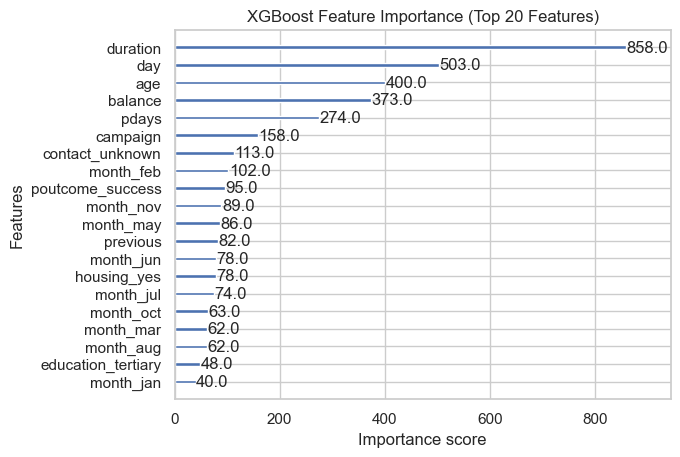

In [14]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot XGBoost feature importance
xgb.plot_importance(xgb_clf, max_num_features=20)
plt.title("XGBoost Feature Importance (Top 20 Features)")
plt.show()


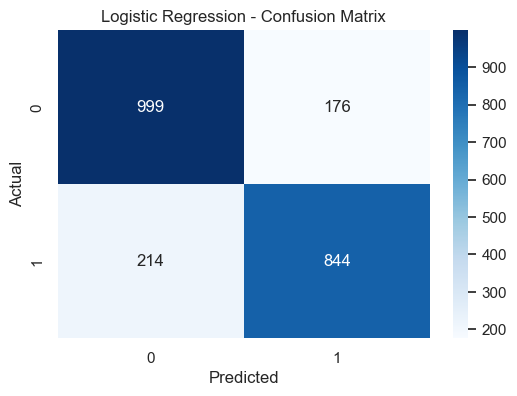

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


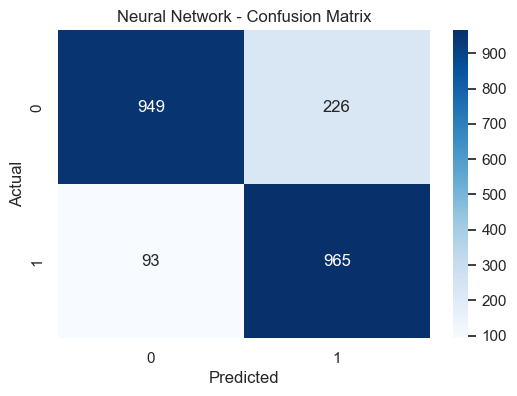

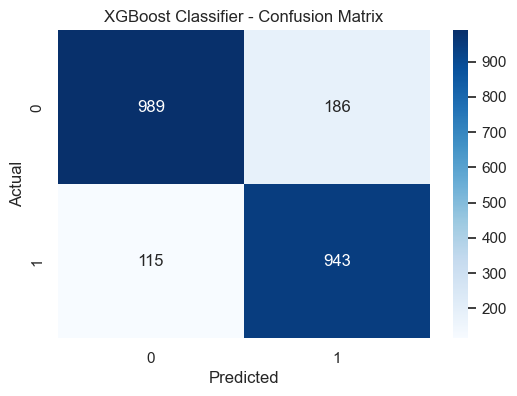

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def get_predictions(model, name):
    if name == "Neural Network":
        # NN outputs probability → convert to class label
        pred_prob = model.predict(X_test).flatten()
        preds = (pred_prob >= 0.5).astype(int)
    else:
        # Logistic Regression & XGBoost produce class labels directly
        preds = model.predict(X_test)
    return preds

models = {
    "Logistic Regression": lr_clf,
    "Neural Network": dl_clf,
    "XGBoost Classifier": xgb_clf
}

for name, model in models.items():
    preds = get_predictions(model, name)
    cm = confusion_matrix(y_test, preds)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

log_grid = GridSearchCV(LogisticRegression(max_iter=2000), log_params, cv=5, scoring='accuracy')
log_grid.fit(X_train, y_train)

best_log = log_grid.best_estimator_
print("Best Logistic Regression Parameters:", log_grid.best_params_)


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [45]:
best_log_model = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='lbfgs',
    max_iter=2000
)

best_log_model.fit(X_train, y_train)

y_pred_lr_best = best_log_model.predict(X_test)
y_pred_lr_best_prob = best_log_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_best_results = {
    "Accuracy": accuracy_score(y_test, y_pred_log_best),
    "Precision": precision_score(y_test, y_pred_log_best),
    "Recall": recall_score(y_test, y_pred_log_best),
    "F1 Score": f1_score(y_test, y_pred_log_best),
    "ROC AUC": roc_auc_score(y_test, best_log_model.predict_proba(X_test)[:,1])
}

log_best_results


{'Accuracy': 0.8248992386923422,
 'Precision': 0.824732229795521,
 'Recall': 0.8005671077504726,
 'F1 Score': 0.8124700239808154,
 'ROC AUC': 0.9069227365965491}

In [29]:
from sklearn.neural_network import MLPClassifier

nn_params = {
    'hidden_layer_sizes': [(64,), (128,), (64,32)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.005],
    'batch_size': [16, 32]
}

nn_grid = GridSearchCV(MLPClassifier(max_iter=300), nn_params, cv=3, scoring='accuracy')
nn_grid.fit(X_train, y_train)

best_nn = nn_grid.best_estimator_
print("Best Neural Network Parameters:", nn_grid.best_params_)


C:\Users\Eileen Lok\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eileen Lok\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eileen Lok\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eileen Lok\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Eileen Lok\tf_env\lib\site-packages\sklearn\neural_netw

Best Neural Network Parameters: {'activation': 'relu', 'batch_size': 32, 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001}


C:\Users\Eileen Lok\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_nn = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    batch_size=32,
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

best_nn.fit(X_train, y_train)

y_pred_nn_best = best_nn.predict(X_test)
y_pred_nn_best_prob = best_nn.predict_proba(X_test)[:, 1]

nn_best_results = {
    "Accuracy": accuracy_score(y_test, y_pred_nn_best),
    "Precision": precision_score(y_test, y_pred_nn_best),
    "Recall": recall_score(y_test, y_pred_nn_best),
    "F1 Score": f1_score(y_test, y_pred_nn_best),
    "ROC AUC": roc_auc_score(y_test, y_pred_nn_prob)
}

nn_best_results


{'Accuracy': 0.83833407971339,
 'Precision': 0.8131176999101527,
 'Recall': 0.8553875236294896,
 'F1 Score': 0.8337171810225702,
 'ROC AUC': 0.9022249929614288}

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

param_grid_xgb = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 4, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_xgb.best_params_)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}


In [49]:
best_xgb = grid_xgb.best_estimator_

y_pred_xgb_best = best_xgb.predict(X_test)
y_pred_xgb_best_prob = best_xgb.predict_proba(X_test)[:, 1]

xgb_best_results = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb_best),
    "Precision": precision_score(y_test, y_pred_xgb_best),
    "Recall": recall_score(y_test, y_pred_xgb_best),
    "F1 Score": f1_score(y_test, y_pred_xgb_best),
    "ROC AUC": roc_auc_score(y_test, y_pred_xgb_best_prob),
}

xgb_best_results


{'Accuracy': 0.8683385579937304,
 'Precision': 0.8422939068100358,
 'Recall': 0.888468809073724,
 'F1 Score': 0.8647654093836247,
 'ROC AUC': 0.9317137915778466}

In [51]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score
)

def evaluate_model(name, y_true, y_pred, y_prob):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_prob)
    }

# -------------------------------
# DEFAULT (Untuned) Models
# -------------------------------
results = []

# Logistic Regression (Default)
results.append(
    evaluate_model("Logistic Regression (Default)", 
                   y_test, 
                   lr_pred,          # updated name
                   lr_pred_prob)     # updated name
)

# Neural Network (Default)
results.append(
    evaluate_model("Neural Network (Default)", 
                   y_test, 
                   dl_pred,          # updated name
                   dl_pred_prob)     # updated name
)

# XGBoost Classifier (Default)
results.append(
    evaluate_model("XGBoost Classifier (Default)", 
                   y_test, 
                   xgb_pred,         # updated name
                   xgb_pred_prob)    # updated name
)


# -------------------------------
# TUNED Models
# -------------------------------
# Tuned Logistic Regression
results.append(
    evaluate_model("Logistic Regression (Tuned)", 
                   y_test, 
                   y_pred_log_best, 
                   y_pred_lr_best_prob)
)

# Tuned Neural Network
results.append(
    evaluate_model("Neural Network (Tuned)", 
                   y_test, 
                   y_pred_nn_best, 
                   y_pred_nn_best_prob)
)

# Tuned XGBoost
results.append(
    evaluate_model("XGBoost (Tuned)", 
                   y_test, 
                   y_pred_xgb_best, 
                   y_pred_xgb_best_prob)
)

# -------------------------------
# Convert to DataFrame
# -------------------------------
comparison_df = pd.DataFrame(results)
display(comparison_df)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (Default),0.825347,0.827451,0.797732,0.812320,0.907297
1,Neural Network (Default),0.857143,0.810243,0.912098,0.858159,0.919200
2,XGBoost Classifier (Default),0.865204,0.835252,0.891304,0.862369,0.932227
3,Logistic Regression (Tuned),0.824899,0.824732,0.800567,0.812470,0.906923
4,Neural Network (Tuned),0.838334,0.813118,0.855388,0.833717,0.902225
5,XGBoost (Tuned),0.868339,0.842294,0.888469,0.864765,0.931714


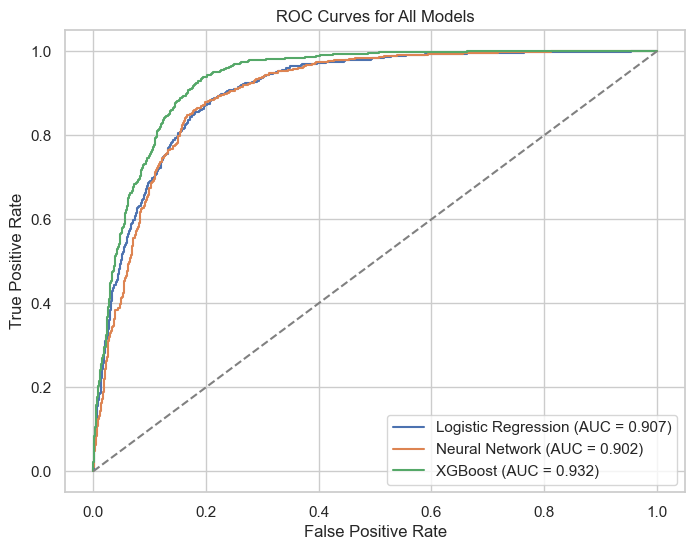

In [57]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_prob)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_prob)
auc_nn = auc(fpr_nn, tpr_nn)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_prob)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.grid(True)
plt.show()
